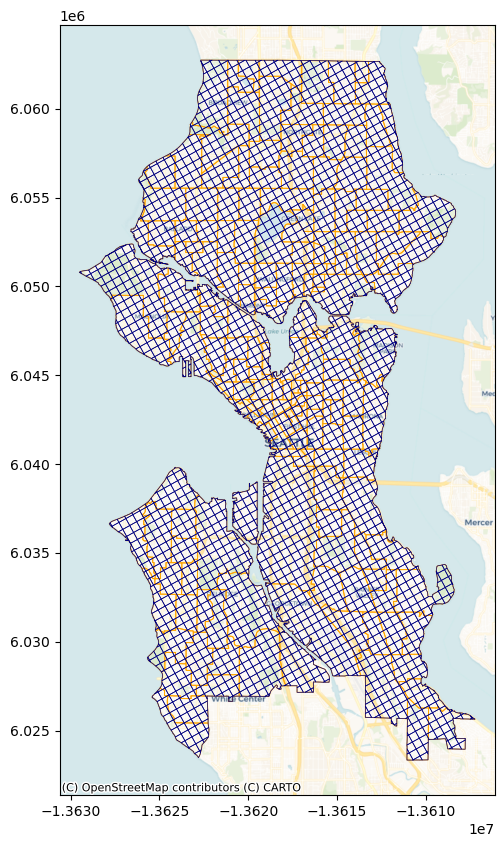

In [7]:
# import libraries
import geopandas as gpd
from shapely.geometry import box
import matplotlib.pyplot as plt
from contextily import add_basemap
# add_basemap 函数用于在现有的 matplotlib 图形上添加底图
import contextily as cx
# contextily 库主要用于在 matplotlib 图形上添加地理底图

# seattle boundary
seattle_boundary = gpd.read_file('Seattle_City_Boundary.geojson')
seattle_boundary = seattle_boundary.to_crs(epsg = 2272) # transform a projection in feet

# set grid
grid_size = 1000 # feet

# draw grids on seattle_boundary
minx,miny,maxx,maxy = seattle_boundary.total_bounds
x_range = maxx-minx
y_range = maxy-miny

# draw grid
rows = int(y_range / grid_size)
cols = int(x_range / grid_size)
grid = []
for i in range(cols + 1):
    for j in range(rows + 1):
        grid.append(box(minx + i * grid_size,miny + j*grid_size,minx + (i + 1) * grid_size,miny + (j + 1)*grid_size))

# choose appropriate crs (eg.Web Mercator Projection)
projected_crs = '3857' # Web Mercator Projection

# make sure same rcs
grid_gdf = gpd.GeoDataFrame(geometry = grid,crs = seattle_boundary.crs) # grid_gdf has the same crs with seattle_boundary
grid_gdf = gpd.clip(grid_gdf,seattle_boundary) # clip grid_gdf with seattle_boundary
grid_gdf = grid_gdf.to_crs(epsg = projected_crs)
seattle_boundary = seattle_boundary.to_crs(epsg = projected_crs)

# centroid
centroids = grid_gdf.centroid

# plot
fig,ax = plt.subplots(figsize = (6,10))

seattle_boundary.plot(ax = ax, color = 'none', edgecolor = 'orange',linewidth = 0.7)
grid_gdf.plot(ax = ax, facecolor = 'none', edgecolor = 'navy',linewidth = 0.5)

cx.add_basemap(ax, crs=grid_gdf.crs.to_string(), source=cx.providers.CartoDB.Voyager, zoom=12)
# cx.add_basemap 函数用于在已有的 matplotlib 坐标轴对象上添加地理底图。
# ax：表示 matplotlib 的坐标轴对象，即要在哪个图形上添加底图。
# crs=grid_gdf.crs.to_string()：指定底图的坐标参考系统。grid_gdf.crs.to_string() 将其坐标参考系统转换为字符串形式，确保底图与地理数据的坐标参考系统一致。
# source=cx.providers.CartoDB.Voyager：指定底图源为 CartoDB 提供的 Voyager 底图。contextily.providers 提供了多种底图源供选择。

plt.show()